In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_parquet("../data/processed/filtered_V1.parquet")
df.memory_usage()

Index                  128
session_id       105393688
index             26348422
elapsed_time      52696844
event_name       105393688
name             105393688
level             13174211
room_coor_x       52696844
room_coor_y       52696844
screen_coor_x     52696844
screen_coor_y     52696844
room_fqid        105393688
level_group      105393688
dtype: int64

In [3]:
scores=pd.read_csv("../data/raw/train_labels.csv")
scores.head(20)

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
5,20090315081004164_q1,0
6,20090315085850788_q1,1
7,20090315101457836_q1,1
8,20090315170769824_q1,1
9,20090317080721164_q1,0


In [4]:
#Check first 5 participants
first_5=[20090312431273200,20090312431273200,20090314121766812,20090314363702160,20090314441803444]
test_df=df[df["session_id"] == first_5[0]]
test_df.head()

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,room_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
1,20090312431273200,1,1323,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
2,20090312431273200,2,831,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
3,20090312431273200,3,1147,person_click,basic,0,-413.991394,-159.314682,380.0,494.0,tunic.historicalsociety.closet,0-4
4,20090312431273200,4,1863,person_click,basic,0,-412.991394,-159.314682,381.0,494.0,tunic.historicalsociety.closet,0-4


<Axes: xlabel='index', ylabel='elapsed_time'>

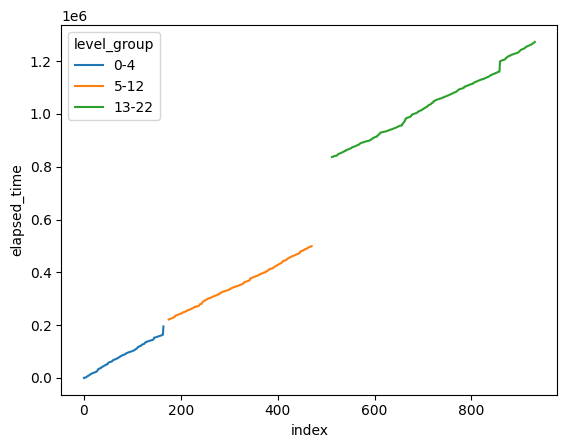

In [5]:
# Evolution of numeric variables
# 1. elapsed time
sns.lineplot(x=test_df["index"],y=test_df["elapsed_time"],hue=test_df["level_group"])  

<Axes: xlabel='index', ylabel='level'>

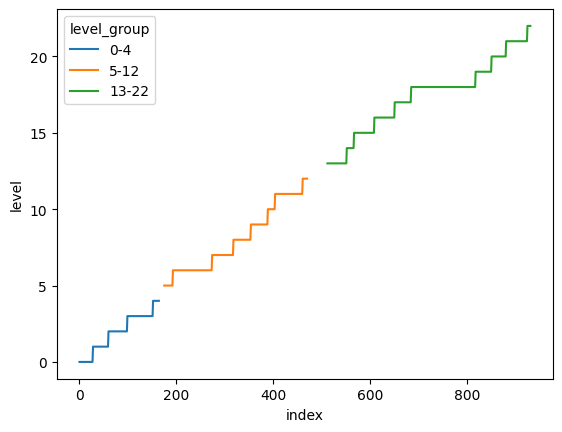

In [6]:
# Level development
sns.lineplot(x=test_df["index"],y=test_df["level"],hue=test_df["level_group"])

<Axes: xlabel='room_coor_x', ylabel='room_coor_y'>

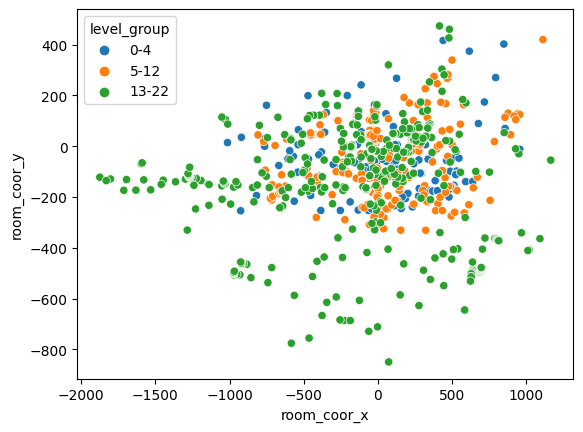

In [7]:
#Room total coordinates
sns.scatterplot(data=test_df,x="room_coor_x",y="room_coor_y",hue="level_group")

<Axes: xlabel='screen_coor_x', ylabel='screen_coor_y'>

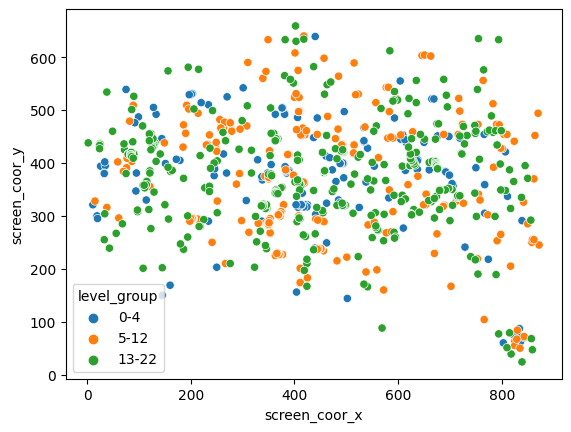

In [8]:
#Room total coordinates
sns.scatterplot(data=test_df,x="screen_coor_x",y="screen_coor_y",hue="level_group")

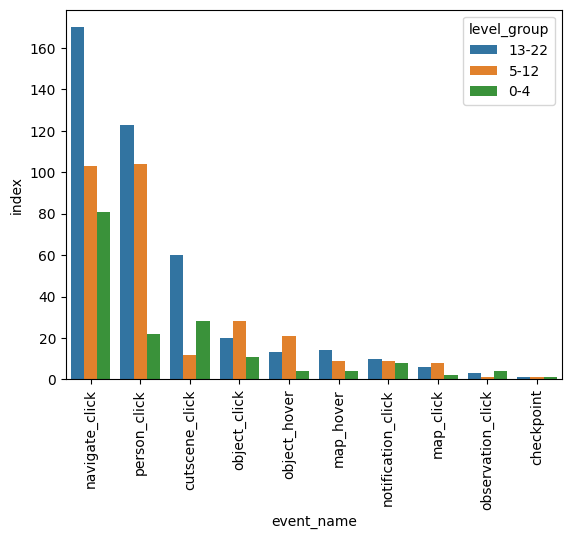

In [9]:
#Event name - Barplot
#Groupby count
plt1=test_df.groupby(by=["event_name","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="event_name",y="index",hue="level_group")
plt.xticks(rotation=90);

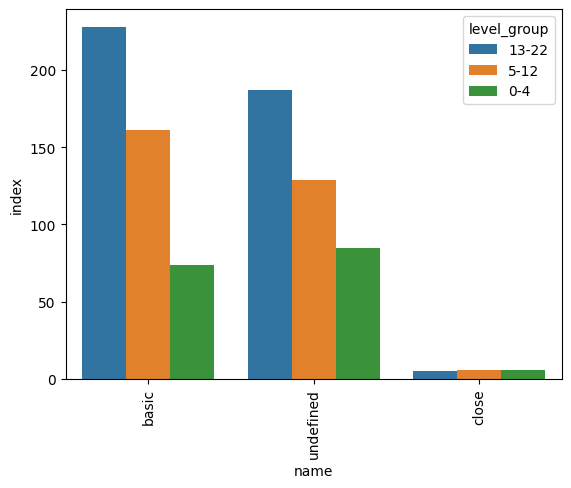

In [10]:
#Event name - Barplot
#Groupby count
plt1=test_df.groupby(by=["name","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="name",y="index",hue="level_group")
plt.xticks(rotation=90);

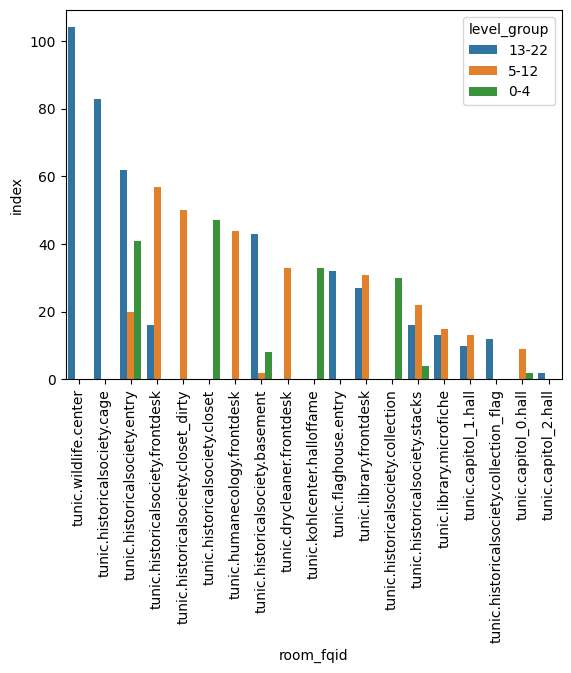

In [11]:
plt1=test_df.groupby(by=["room_fqid","level_group"]).count()["index"].sort_values(ascending=False).reset_index()
sns.barplot(data=plt1,x="room_fqid",y="index",hue="level_group")
plt.xticks(rotation=90);

In [17]:
#Extracción de puntaje
scores.head()
#filter
scores["user_id"] = scores["session_id"].str.rpartition("_")[0]

In [24]:
first_5[0]

20090312431273200

In [28]:
scores["user_id"]=pd.to_numeric(scores["user_id"])

In [29]:
scores[scores["user_id"]==first_5[0]]

,session_id,correct,user_id
0,20090312431273200_q1,1,20090312431273200
11779,20090312431273200_q2,1,20090312431273200
23558,20090312431273200_q3,1,20090312431273200
35337,20090312431273200_q4,1,20090312431273200
47116,20090312431273200_q5,1,20090312431273200
58895,20090312431273200_q6,1,20090312431273200
70674,20090312431273200_q7,1,20090312431273200
82453,20090312431273200_q8,1,20090312431273200
94232,20090312431273200_q9,1,20090312431273200
106011,20090312431273200_q10,1,20090312431273200
